## Deep Learning for Self-Driving Car

## Project: Traffic Sign Recognition Classifier


In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print("Data loaded")

Data loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples
n_test = len(X_test)

# Shape of a traffic sign image
image_shape = X_train[0].shape

# Number of unique classes/labels in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s).

**NOTE:** It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

2


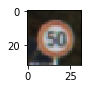

In [3]:
### Data exploration visualization of a random image in the data set
import matplotlib.pyplot as plt
import random

%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture of LeNet-5 with my twist and take

Design and implement a deep learning model that learns to recognize traffic signs. Train and test the model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation is shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81).

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).

### Pre-process the Data Set (normalization, grayscale, shuffle, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data.

In [4]:
### Preprocess the data (shuffle the data set)
import cv2
'''
def grayscale(image_set):
    gray_set = []
    for index in range(0, len(image_set)):
        gray_image = cv2.cvtColor(image_set[index], cv2.COLOR_RGB2GRAY)
        gray_image.reshape(32,32,1)
        gray_set.append(gray_image)
    return gray_set

def process_data(image_set):
    image_set = image_set / 255
    return image_set
'''

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture of my twist on LeNet-5

In [5]:
### LeNet-5 architecture with my twist
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Number of training count
EPOCHS = 60

# Number of image in each batch
BATCH_SIZE = 128

def LeNet_architecture(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05 #0.05
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding="VALID") + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    
    # Layer 2: Convolutional. Input = 14x14x6 Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding="VALID") + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    
    # Flatten. Input = 5x5x16. Output = 400.
    flat_layer = flatten(conv2)
    
    
    # First dropout after flatten layer
    flat_layer = tf.nn.dropout(flat_layer, keep_prob)
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(120))
    fc3 = tf.matmul(flat_layer, fc3_W) + fc3_b
    
    # Activation.
    fc3 = tf.nn.relu(fc3)
    
    
    # Second dropout after first fully connected layer
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(84))
    fc4 = tf.matmul(fc3, fc4_W) + fc4_b
    
    # Activation.
    fc4 = tf.nn.relu(fc4)
    
    
    # Third dropout after second fully connected layer
    fc4 = tf.nn.dropout(fc4, keep_prob)
    
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc5_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc5_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc4, fc5_W) + fc5_b
    
    return logits

### Features and Labels

In [6]:
# Define features, labels, keep probability and one-hot encoding
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Training the model
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set will be calculated and reported as well.

rate = 0.0007 #0.0007 optimal

# Traning pipeline
logits = LeNet_architecture(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Accuracy analysis
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()


# Function to evaluate the model
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# Traning the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.75}) #0.75 optimal
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.809

EPOCH 2 ...
Validation Accuracy = 0.899

EPOCH 3 ...
Validation Accuracy = 0.922

EPOCH 4 ...
Validation Accuracy = 0.949

EPOCH 5 ...
Validation Accuracy = 0.942

EPOCH 6 ...
Validation Accuracy = 0.951

EPOCH 7 ...
Validation Accuracy = 0.939

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.955

EPOCH 10 ...
Validation Accuracy = 0.960

EPOCH 11 ...
Validation Accuracy = 0.957

EPOCH 12 ...
Validation Accuracy = 0.956

EPOCH 13 ...
Validation Accuracy = 0.961

EPOCH 14 ...
Validation Accuracy = 0.957

EPOCH 15 ...
Validation Accuracy = 0.964

EPOCH 16 ...
Validation Accuracy = 0.962

EPOCH 17 ...
Validation Accuracy = 0.956

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.965

EPOCH 20 ...
Validation Accuracy = 0.963

EPOCH 21 ...
Validation Accuracy = 0.962

EPOCH 22 ...
Validation Accuracy = 0.965

EPOCH 23 ...
Validation Accuracy = 0.956

EPOCH 24 ...
Validation Accura

### Test

In [8]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    train_accuracy = evaluate(X_train, y_train)
    valid_accuracy = evaluate(X_valid, y_valid)
    test_accuracy = evaluate(X_test, y_test)
    
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 0.999
Validation Accuracy = 0.961
Test Accuracy = 0.948


---

## Step 3: Test a Model on New Images

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Resize images

In [9]:
# Resize test images into appropriate LeNet-5 input size (32,32,3)
import matplotlib.image as mpimg

def resize(image):
    new_img = np.copy(image)
    new_img = cv2.resize(new_img, (32,32))
    return new_img

### Load and output images

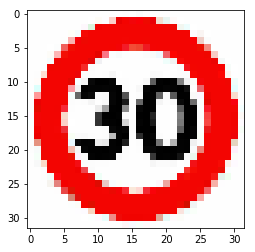

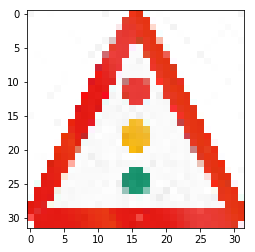

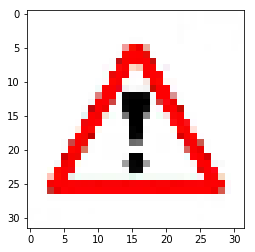

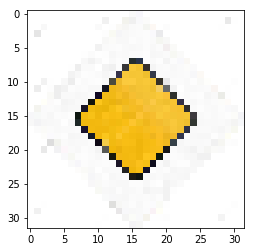

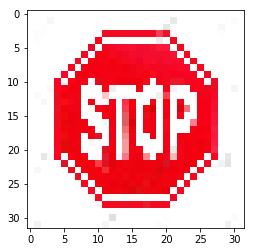

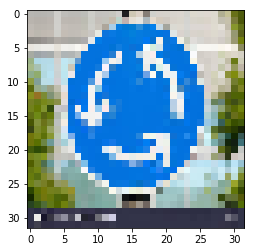

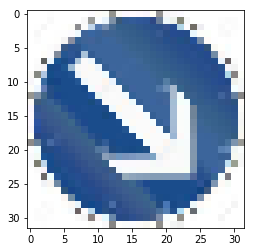

In [10]:
### Load the images and plot them
import glob

test_images = glob.glob('test_images/*.jpg')
accuracy_images = []
for image in test_images:
    img = mpimg.imread(image)
    img = resize(img)
    accuracy_images.append(img)
    plt.figure()
    plt.imshow(img)
    
accuracy_images = np.asarray(accuracy_images)

### Predict the Sign Type for Each Image and Test Accuracy

In [11]:
### Run the predictions and use the model to output the prediction for each image.

test_label_array = np.array([1,26,18,12,14,40,38])

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_test_accuracy = evaluate(accuracy_images, test_label_array)
    print("Test Accuracy = {:.3f}".format(my_test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image) with [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k).

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [12]:
### Print out the top five softmax probabilities for the predictions on the test German traffic sign images above

softmax = tf.nn.softmax(logits)
top_5 = tf.nn.top_k(softmax, k=5)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_logits = sess.run(softmax, feed_dict={x: accuracy_images, keep_prob: 1.0})
    top_5 = sess.run(top_5, feed_dict={x: accuracy_images, keep_prob: 1.0})
    print(softmax_logits)
    print(top_5)

INFO:tensorflow:Restoring parameters from ./lenet
[[  7.13195345e-13   9.99999881e-01   6.97483031e-08   6.61054530e-26
    4.74931997e-13   9.65118488e-14   5.68245618e-17   3.85874372e-15
    1.96349037e-24   3.15823646e-28   4.70563437e-20   3.57966856e-19
    1.66921408e-13   2.35339114e-12   3.34561876e-25   7.49583205e-22
    1.84002748e-35   1.26389398e-19   9.79494425e-18   8.78681644e-29
    1.09368408e-26   5.44408870e-15   5.78789044e-37   4.68992860e-23
    1.65111301e-22   5.09637277e-10   1.23661086e-17   4.46295633e-30
    3.75131431e-28   2.28449574e-22   6.61951361e-23   2.08351351e-20
    8.96799071e-28   4.47632444e-22   3.34875896e-33   2.59165095e-19
    2.18525957e-22   2.30621893e-15   3.68737821e-16   2.49847898e-18
    3.81268612e-13   6.38646751e-26   9.87760744e-25]
 [  4.26813207e-13   1.82289581e-13   2.57720033e-13   1.50939286e-17
    2.27261379e-14   3.25583418e-18   1.45009518e-19   5.85146612e-16
    1.01720733e-11   5.13072495e-13   1.49177444e-16   7

---

## Step 4: Visualize the Neural Network's State with Test Images

This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize the network's feature maps

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

testing_image = mpimg.imread('test_images/stop-14.jpg')
testing_image = resize(testing_image)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
